<a href="https://colab.research.google.com/github/fruktwow/g_colab/blob/main/shukla_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [527]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform 

**Generating 20 data pair using the given formula**

In [528]:
x=np.linspace(0,1,20).reshape(-1,1)
y=[]
for sx in x:
  y.append(np.sin(2*np.pi*sx)+ 0.1 *np.random.normal(0,1))
y = np.array(y)

**Splitting 20 dataset into 10-10 for testing and training**

In [529]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [530]:
xm = np.linspace(0,1,100).reshape((-1,1));  
ym = []
for sx in xm:
  ym.append(np.sin(2*np.pi*sx))
ym = np.array(ym)

**Drawing chart for degree 0,1,3,9.**

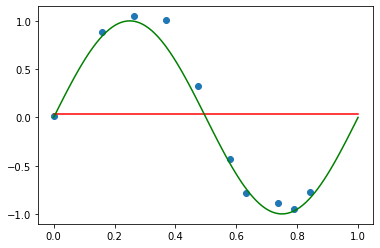

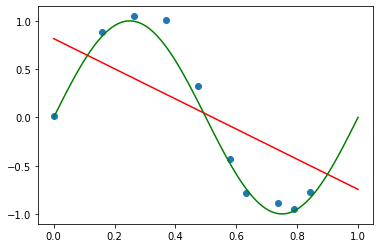

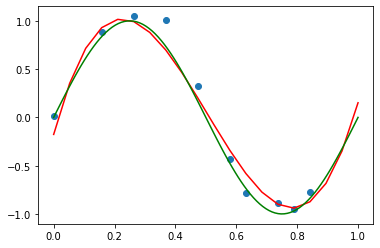

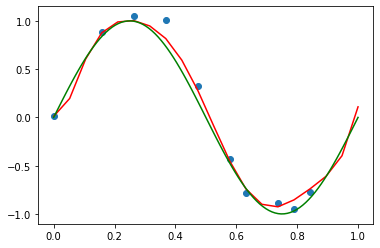

In [531]:
w0 = []
w1 = []
w3 = []
w9 = []
degree_order = [0,1,3,9]
for i in range(len(degree_order)):
  poly_reg = PolynomialFeatures(degree = degree_order[i])
  x_poly = poly_reg.fit_transform(x)
  poly_reg.fit(x_poly, y)
  model = LinearRegression()
  model.fit(x_poly, y)

  if degree_order[i] == 0:
    w0 = model.coef_
  elif degree_order[i] == 1:
    w1 = model.coef_
  elif degree_order[i] == 3:
    w3 = model.coef_
  else:
    w9 = model.coef_

  plt.figure(i)
  plt.plot(np.sort(x), model.predict(poly_reg.fit_transform(np.sort(x))), color = 'red')
  plt.plot(xm,ym, color='green')
  plt.scatter(X_train,y_train)

In [532]:
w0 = w0.reshape(-1,1)
w1 = w1.reshape(-1,1)
w3 = w3.reshape(-1,1)
w9 = w9.reshape(-1,1)

**Showing the weights for degree 0,1,3,9.**

In [533]:
print("--------------------------")
print("            M = 0         ")
print("--------------------------")
print(w0)
print("--------------------------")
print("            M = 1         ")
print("--------------------------")
print(w1)
print("--------------------------")
print("            M = 3         ")
print("--------------------------")
print(w3)
print("--------------------------")
print("            M = 9         ")
print("--------------------------")
print(w9)


--------------------------
            M = 0         
--------------------------
[[0.]]
--------------------------
            M = 1         
--------------------------
[[ 0.       ]
 [-1.5621054]]
--------------------------
            M = 3         
--------------------------
[[  0.        ]
 [ 11.77913722]
 [-33.74790877]
 [ 22.29662978]]
--------------------------
            M = 9         
--------------------------
[[ 0.00000000e+00]
 [-4.38669760e+00]
 [ 2.39879417e+02]
 [-2.13992225e+03]
 [ 9.46056532e+03]
 [-2.42157345e+04]
 [ 3.68537091e+04]
 [-3.26855523e+04]
 [ 1.55520017e+04]
 [-3.06046167e+03]]


In [534]:
y_train_pred_list = []
for x in X_train:
 y_train_pred_element = w9[0] + w9[1]*x + w9[2]*x**2 + w9[3]*x**3 + w9[4]*x**4 + w9[5]*x**5 + w9[6]*x**6 + w9[7]*x**7 + w9[8]*x**8 + w9[9]*x**9
 y_train_pred_list.append(y_train_pred_element)
  
y_train_pred_list = np.array(y_train_pred_list)
print(y_train_pred_list)
print(X_train)

[[ 0.99130428]
 [-0.93743681]
 [ 0.2674242 ]
 [ 0.80535574]
 [-0.75191182]
 [-0.4659326 ]
 [ 0.86464324]
 [ 0.        ]
 [-0.86578177]
 [-0.75171754]]
[[0.26315789]
 [0.73684211]
 [0.47368421]
 [0.36842105]
 [0.84210526]
 [0.57894737]
 [0.15789474]
 [0.        ]
 [0.78947368]
 [0.63157895]]


In [535]:
y_test_pred_list = []
for x in X_test:
 y_test_pred_element = w9[0] + w9[1]*x + w9[2]*x**2 + w9[3]*x**3 + w9[4]*x**4 + w9[5]*x**5 + w9[6]*x**6 + w9[7]*x**7 + w9[8]*x**8 + w9[9]*x**9
 y_test_pred_list.append(y_test_pred_element)
 
y_test_pred_list = np.array(y_test_pred_list)
print(y_test_pred_list)

[[-0.40811282]
 [ 0.18518183]
 [ 0.09815904]
 [ 0.58193808]
 [-0.10295728]
 [-0.62162452]
 [ 0.93604074]
 [-0.91138877]
 [ 0.97775306]
 [ 0.59452584]]


In [536]:
error_train = []
erms_train = []
for i in range(len(y_train_pred_list)):
  error_train = sqrt(sum((y_train_pred_list[i]-y_train)**2)/len(y_train_pred_list[i]))
  erms_train.append(error_train)

In [537]:
error_test = []
erms_test = []
for i in range(len(y_test_pred_list)):
  error_test = np.sqrt(sum((y_test_pred_list[i]-y_test)**2)/len(y_test_pred_list[i]))
  erms_test.append(error_test)

In [538]:
print(erms_test)

[array([2.47544012]), array([1.8190271]), array([1.81156355]), array([2.31340113]), array([1.94900842]), array([2.97739759]), array([3.13591627]), array([3.74670719]), array([3.24454294]), array([2.33841155])]


In [539]:
print(erms_train)

[4.124447777340799, 3.72002768348001, 2.664330360592848, 3.6694028476048324, 3.3029778455703287, 2.7826641911020307, 3.81053793653293, 2.467323424105839, 3.5532760899837648, 3.302568140589968]


In [540]:
order = []
for i in range(10):
  order.append(i)

SUB = str.maketrans("RMS", "ᵣₘₛ")

**Train Vs Test ERROR**

Text(0, 0.5, 'Eᵣₘₛ')

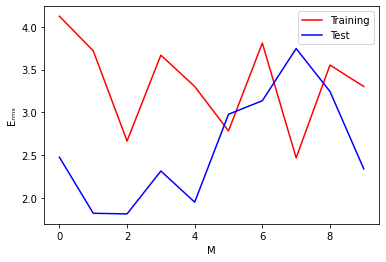

In [541]:
plt.plot(order, erms_train,color = 'red')
plt.plot(order,erms_test, color = 'blue')
plt.legend(['Training', 'Test'])
plt.xlabel('M')
plt.ylabel("ERMS".translate(SUB))

**100 more data is plotted for 9th order model**

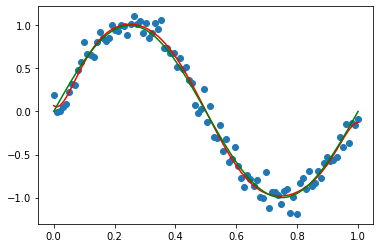

In [542]:
xl=np.linspace(0,1,100).reshape(-1,1)
yl=[]
for sx in xl:
  yl.append(np.sin(2*np.pi*sx)+ 0.1 *np.random.normal(0,1))
yl = np.array(yl)
poly_reg = PolynomialFeatures(degree = 9)
x_poly = poly_reg.fit_transform(xl)
poly_reg.fit(x_poly, yl)
model = LinearRegression()
model.fit(x_poly, yl)
plt.figure(10)
plt.plot(np.sort(xl), model.predict(poly_reg.fit_transform(np.sort(xl))), color = 'red')
plt.plot(xl,ym, color='green')
plt.scatter(xl,yl)
